In [1]:
import torch

In [2]:
from mymodel import VisionTransformer

In [3]:
modelpath = '../../MyModels/model.ckpt'

In [4]:
model_dic = torch.load(modelpath)

In [5]:
model_kwargs={'embed_dim': 8,
'hidden_dim': 8,
'num_heads': 8,
'num_layers': 6,
'patch_size': 4,
'num_channels': 3,
'num_patches': 64,
'num_classes': 10,
'dropout': 0.2}

In [6]:
vit = VisionTransformer(**model_kwargs)

In [7]:
vit.load_state_dict(model_dic)

<All keys matched successfully>

In [8]:
from transformers.tf_exp import TransformerScorer

In [9]:
model = TransformerScorer('vit', imgpix=32)

In [10]:
p = torch.rand((100, 3, 32, 32))

In [11]:
model_unit = ("vit", ".mlp_head.Linear1", 0)

In [12]:
model.select_unit(model_unit)

In [13]:
model.score_tsr(p)

array([1.97476959, 1.87042737, 1.90019059, 1.69983137, 1.4917419 ,
       1.83948469, 1.9588151 , 1.29505849, 0.37356323, 1.84453773,
       2.10773134, 2.33581734, 1.93036711, 1.42504811, 1.91250253,
       1.2474674 , 2.00068593, 1.91555345, 1.63625085, 1.75875068,
       2.18936467, 2.11082959, 2.01130676, 1.83797288, 1.89641297,
       2.43269467, 1.35345244, 1.79095066, 1.69618928, 2.06453991,
       1.4025681 , 1.95110178, 1.75911283, 1.85882723, 1.99837422,
       1.42103636, 1.80487478, 1.93870878, 2.00301194, 1.84851301,
       1.91994464, 1.79942679, 1.8565191 , 1.37071621, 1.42864799,
       2.0152142 , 1.98169768, 1.84717953, 1.6692853 , 1.80093813,
       1.96882641, 1.70557272, 1.63488591, 1.53700674, 1.61750805,
       1.98398721, 1.42022717, 2.09507203, 1.3891176 , 1.6119312 ,
       1.69265056, 2.03758836, 1.53607678, 1.90037346, 1.48941422,
       1.60801625, 1.6082958 , 1.71351624, 2.01221561, 2.05591273,
       1.41542768, 2.01589513, 1.57439709, 1.94226813, 2.11905

In [14]:
from transformers.tf_exp import TransformerEvolution

In [15]:
exp = TransformerEvolution(model_unit, imgsize=(32, 32))

Space dimension: 4096, Population size: 40, Select size:20, Optimization Parameters:
Initial sigma: 3.000
cc=0.001, cs=0.050, c1=0.000 damps=1.050


In [16]:
exp.run()

synth img scores: mean 0.868 +- std 0.000
step 0  time: total 0.62s | GAN visualize 0.56s   Transformers score 0.00s   optimizer step 0.05s
sigma: 2.90
synth img scores: mean 0.565 +- std 0.506
step 1  time: total 0.15s | GAN visualize 0.08s   Transformers score 0.02s   optimizer step 0.04s
sigma: 2.82
synth img scores: mean 0.892 +- std 0.532
step 2  time: total 0.14s | GAN visualize 0.08s   Transformers score 0.02s   optimizer step 0.04s
sigma: 2.76
synth img scores: mean 1.494 +- std 0.517
step 3  time: total 0.14s | GAN visualize 0.08s   Transformers score 0.02s   optimizer step 0.04s
sigma: 2.71
synth img scores: mean 2.037 +- std 0.357
step 4  time: total 0.14s | GAN visualize 0.08s   Transformers score 0.02s   optimizer step 0.03s
sigma: 2.66
synth img scores: mean 2.091 +- std 0.399
step 5  time: total 0.14s | GAN visualize 0.08s   Transformers score 0.02s   optimizer step 0.03s
sigma: 2.62
synth img scores: mean 2.376 +- std 0.408
step 6  time: total 0.12s | GAN visualize 0.06

In [17]:
import numpy as np

In [18]:
from core.insilico_exps import resize_and_pad_tsr

In [20]:
idx = np.argmax(exp.scores_all)
select_code = exp.codes_all[idx : idx + 1, :]
score_select = exp.scores_all[idx]
img_select = exp.render_tsr(select_code)
resize_select = resize_and_pad_tsr(img_select, exp.imgsize, exp.corner, canvas_size=(32, 32))
resize_select = resize_select.cpu().squeeze().permute((1, 2, 0)).numpy()

In [21]:
import skimage

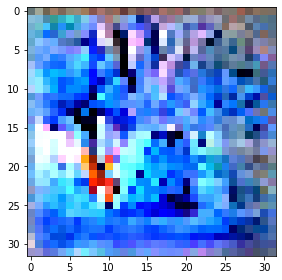

In [22]:
skimage.io.imshow(resize_select)

In [23]:
exp.analyze_traj()

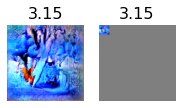

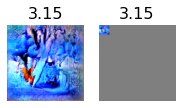

In [24]:
exp.visualize_best()

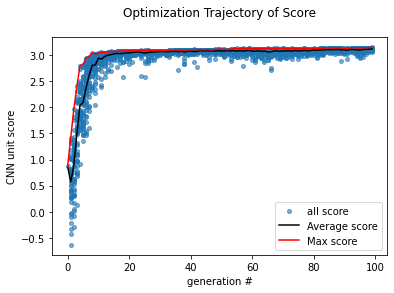

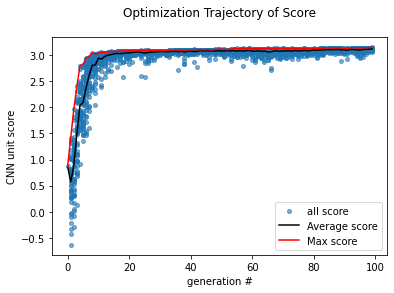

In [25]:
exp.visualize_trajectory()